In [23]:
from Analyzor.DataFactory import DataFactory
from Analyzor.VertexAnalyzor import GetRange,FilterBackground
from Analyzor import VertexAnalyzor
import pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)


In [2]:
dp = DataFactory('data/SQL/10C/85_8.db','data/SQL/10C/ProtoMap.db')

initialization will take some time
143.15545392
   PadNum        PadName     PadX      PadY  BinNum
0       0  sector_center  0.00000  0.000000     257
1       1      sector1_0  1.30108  0.947523       1
2       2      sector2_0  2.18496  1.831410       2
3       3      sector1_1  2.71529  2.361740       3
4       4      sector2_1  3.59917  3.245620       4
loading finished
begin processing
15.1204731464
30.9998881817
processing finished


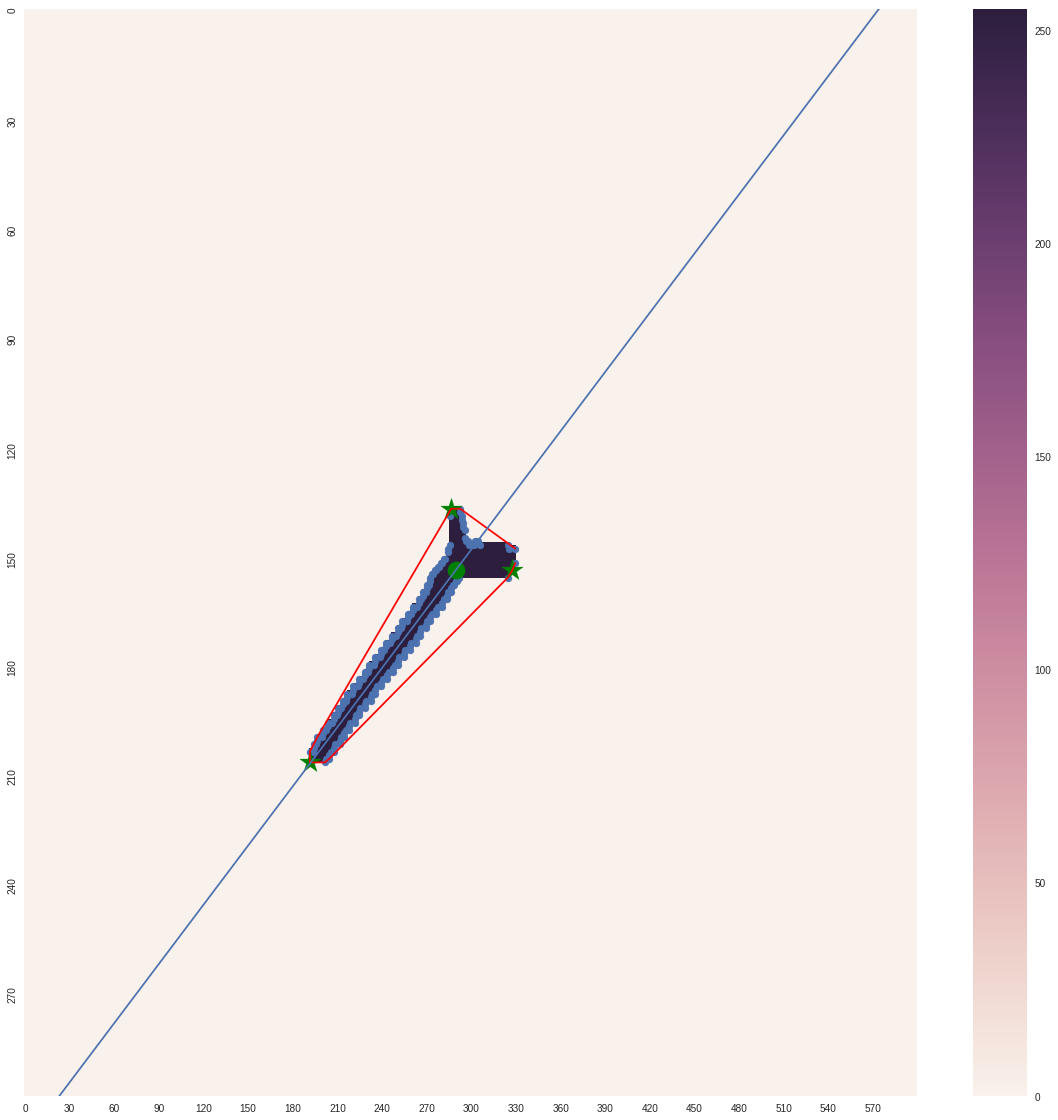

In [24]:
image = dp.ConstructImage(1)
image = VertexAnalyzor.FilterBackground(image)
r = VertexAnalyzor.GetRange(image,1)